# Noções basicas de systema de classificação 👨‍🎓💻

In [134]:
import pandas as pd

In [135]:
path = "ml-latest-small\\movies.csv"

path1 = "ml-latest-small\\ratings.csv"

filmes = pd.read_csv(path)
filmes = filmes.set_index("movieId")


notas = pd.read_csv(path1)

In [139]:
votos = notas["movieId"].value_counts()

In [140]:
filmes["Total notas"] = votos

In [141]:
filmes.sort_values("Total notas", ascending=False).head()

,title,genres,Total notas
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,97999.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,87899.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,84545.0


In [142]:
media_votos = notas.groupby("movieId").mean()["rating"]

filmes["media"] = media_votos

In [143]:
filmes.sort_values("media", ascending=False).head()

,title,genres,Total notas,media
movieId,,,,
169338,Brad Williams: Daddy Issues (2016),Comedy,2.0,5.0
187729,Ab-normal Beauty (2004),Horror,1.0,5.0
172149,Back to You and Me (2005),Drama|Romance,1.0,5.0
160966,You're Human Like the Rest of Them (1967),(no genres listed),1.0,5.0
134387,At Ellen’s Age (2011),Comedy|Drama,1.0,5.0


# Plotando Gráfico para compreensão de calculo das distâncias

## Calculando distância entre pontos usando hipotenusa

In [181]:
import matplotlib.pyplot as plt
import numpy as np

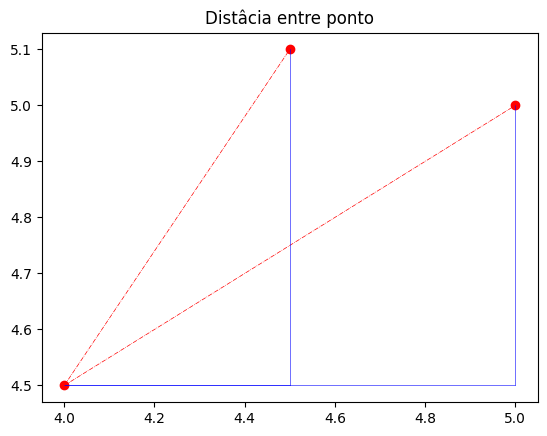

In [183]:
plt.plot(4, 4.5, "ro")
plt.plot(5, 5, "ro")
plt.plot(4.5, 5.1, "ro")


plt.title("Distâcia entre ponto")

plt.plot([4, 5], [4.5, 4.5], "b", linestyle="-", linewidth=0.4)
plt.plot([5, 5], [4.5, 5], "b", linestyle="-", linewidth=0.4)
plt.plot([4, 5], [4.5, 5], "r", linestyle="-.", linewidth=0.5)

plt.plot([4, 4.5], [4.5, 4.5], "b", linestyle="-", linewidth=0.4)
plt.plot([4.5, 4.5], [4.5, 5.1], "b", linestyle="-", linewidth=0.4)
plt.plot([4, 4.5], [4.5, 5.1], "r", linestyle="-.", linewidth=0.5)

<img src="https://th.bing.com/th/id/R.28919f8b135e7cdeff26b7d4129931a9?rik=5lHQbXUq1w9WgQ&riu=http%3a%2f%2f4.bp.blogspot.com%2f-k7tYdaYjOW4%2fUBL5s5XtZcI%2fAAAAAAAAAD0%2fUACGq8y7mbU%2fs1600%2fPITAGORAS.jpg&ehk=krc9hmNroU0j9m34QvqEUkq0BajwTRUOZ%2bOPj7yQs3g%3d&risl=&pid=ImgRaw&r=0" width="700" height="800">

### Calculando catetos na mão, e usando a biblioteca numpy

In [124]:
from math import sqrt

pontosA = np.array([4, 4.5])
pontosB = np.array([5, 5])

sqrt(sum(abs(pontosA - pontosB)**2))

1.118033988749895

In [126]:
np.linalg.norm(pontosA - pontosB)

1.118033988749895

### Função para calcular hipotenusa

In [130]:
def hipotenusa(a, b):
    return np.linalg.norm(a - b)
    
hipotenusa(pontosA , pontosB)

1.118033988749895

### Função para obter notas de 1 usuário. 👨‍

In [232]:
def nota_usuario(id_usuario):
    return notas.query("userId ==%d" % id_usuario)[["movieId", "rating"]].set_index("movieId")

notas_usuarios(1).head()

,rating
movieId,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5


### Função para obter notras de 2 usuários. 🧑‍ 🧑‍

In [233]:
def direfencas_usuarios(id1, id2):
    return nota_usuario(id1).join(notas_usuarios(id2), lsuffix="_L", rsuffix="_R" ).dropna()

direfencas_usuarios(1, 4).head()

,rating_L,rating_R
movieId,,
481,3.5,4.0
1091,1.5,1.0
1590,2.5,3.5
1591,1.5,3.5
2478,4.0,3.0


### Função para obter sistancias entre de 2 usuários. 🧑‍ 🧑‍

In [229]:
def distancias_entre_usuarios(id1, id2, semelhanca = 5):
    """
        Entrada:
            ID do usuário 1 e ID do usuário 2
            
        Cálculo:
            Calcula a diferencça entre usuários usando hipotenusa
            
        Retorno:
            Retorno uma lista com ID usuáio 1, ID usuário 2 e a distância.
    """
    notas = direfencas_usuarios(id1, id2)
    
    if notas.shape[0] <= semelhanca:
        return [id1, id2, None]
    
    else:
        distancia = hipotenusa(notas["rating_L"], notas["rating_R"])

        return [id1, id2, distancia]

distancias_entre_usuarios(1, 4)

[1, 4, 3.0413812651491097]

In [278]:
def lista_distancia_todos_usuarios(usuario_id, usuario_a_ser_comprado, min_compracao = None):
    l = []
    
    if min_compracao == None:
        min_compracao = len(usuario_a_ser_comprado)
    
    for id_usuario in usuario_a_ser_comprado[:min_compracao]:
        distancias = distancias_entre_usuarios(usuario_id, id_usuario, 5)
        
        if distancias[2] == None or distancias[1] == usuario_id:
            pass
        
        else:
            l.append(distancias_entre_usuarios(usuario_id, id_usuario, 5))
    
    return pd.DataFrame(l)

usuarios_total = notas["userId"].sample(1000).unique()

l = lista_distancia_todos_usuarios(1, usuarios_total, 10)

In [280]:
l

""
